In [ ]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [4]:
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

In [ ]:
%matplotlib inline

from pyspec.core import *
from pyspec.utils import *
import matplotlib.pyplot as plt

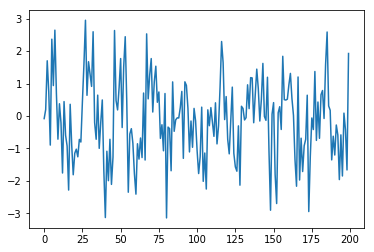

In [ ]:
M = 30    # window length = embedding dimension
N = 200   # length of generated time series
T = 22    # period length of sine function
stdnoise = 1 # noise-to-signal ratio

t = np.array(range(N))
X = np.sin(2*np.pi*t/T)
noise = stdnoise*np.random.randn(len(X))

X = X+noise

ts = TimeSeries(X)

plt.plot(X)

In [73]:
ssa = SSA(ts,30)

X_traj = np.zeros([ssa.K,ssa.L])

for i in range(ssa.L):
    X_traj[:,i] = ssa.TS[i:(ssa.K+i)] 

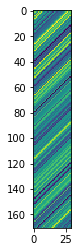

In [74]:
plt.imshow(X_traj)

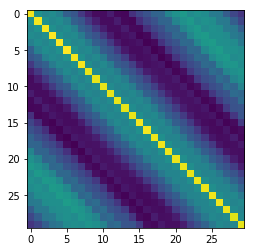

In [75]:
X_cov = (X_traj.T@X_traj)/ssa.K

plt.imshow(X_cov)

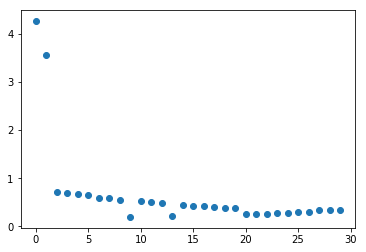

In [111]:
eigvals, W = np.linalg.eig(X_cov)
PCs = (X_traj@W).T

plt.scatter(range(30),eigvals[0:30])

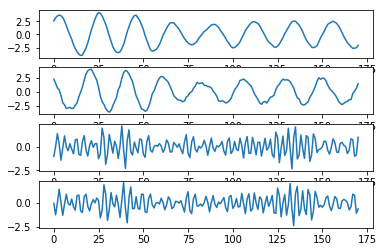

In [78]:
n=4
f, arr = plt.subplots(n)

for i in range(n):
    arr[i].plot(PCs[i])

In [79]:
RCs = np.zeros([len(ts),M])

for i in range(M):
    X_proj = PCs[:,i:i+1]@W[:,i:i+1].T #Matrix from projeciton inversion



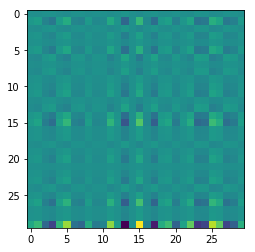

In [ ]:
plt.imshow(np.flip(np.matmul(PCs[:,3:4],W[:,3:4].T)))

In [133]:
PCs[:,0:2].shape

(30, 2)